# Combining Monte Carlo Simulation with AI

## Single Queue Single Server Simulation

![Truck](truck.png)

### Individual simulations
Import Python modules

In [1]:
from simulation import Simulation, GeneratorFactory
from generator import LogisticGenerator, UniformGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Definition of the random generators using Logistic and Uniform probability distributions. 1000 samples is going to be generated for each of them.

In [2]:
number_of_samples = 1000 

# Standard logistic distribution
class LogisticFactoryI(GeneratorFactory):
    
    def createArrivals(self):
        return LogisticGenerator(1, 0.2, self.number_of_samples, self.seed)
    
    def createServices(self):
        return LogisticGenerator(0.5, 0.1, self.number_of_samples, self.seed)
    
# Logistic distribution with higher frequency of arrivals   
class LogisticFactoryII(GeneratorFactory):
    
    def createArrivals(self):
        return LogisticGenerator(0.6, 0.2, self.number_of_samples, self.seed)
    
    def createServices(self):
        return LogisticGenerator(0.5, 0.1, self.number_of_samples, self.seed)
    
# Logistic distribution with higher frequency of services
class LogisticFactoryIII(GeneratorFactory):
    
    def createArrivals(self):
        return LogisticGenerator(0.5, 0.2, self.number_of_samples, self.seed)
    
    def createServices(self):
        return LogisticGenerator(0.15, 0.1, self.number_of_samples, self.seed)
    
# Uniform distribution
class UniformFactory(GeneratorFactory):
    
    def createArrivals(self):
        return UniformGenerator(0, 3, self.number_of_samples, self.seed)
    
    def createServices(self):
        return UniformGenerator(0.15, 2, self.number_of_samples, self.seed)
    
factory = [LogisticFactoryI(number_of_samples), 
           LogisticFactoryII(number_of_samples),
           LogisticFactoryIII(number_of_samples),
           UniformFactory(number_of_samples)]

Run simulation for every probability distribution

Simulation #1
Number of samples taken:  1000
Number of clients generated:  1000
Number of clients served:  1000
Queue report:
Items entered:  1000
Items departed:  1000
Queue current length:  0
Queue max length:  2
Queue mean length:  0.03
Queue mean delay:  0.03
Server utiliation:  0.5
Number of clients served:  1000


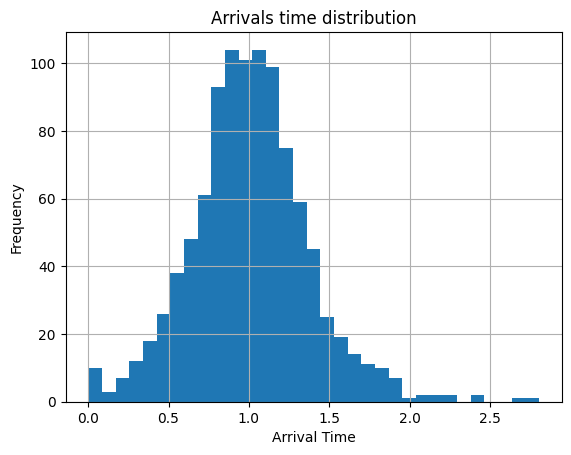

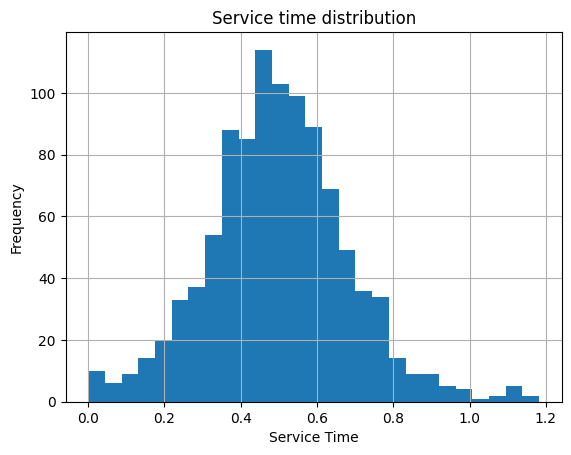

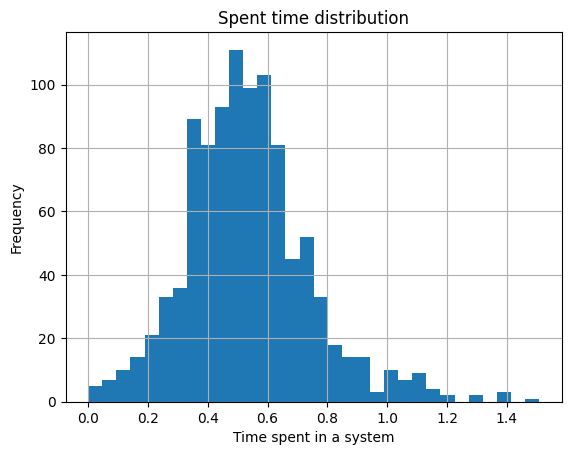

Simulation #2
Number of samples taken:  1000
Number of clients generated:  1000
Number of clients served:  1000
Queue report:
Items entered:  1000
Items departed:  1000
Queue current length:  0
Queue max length:  9
Queue mean length:  0.87
Queue mean delay:  0.52
Server utiliation:  0.82
Number of clients served:  1000


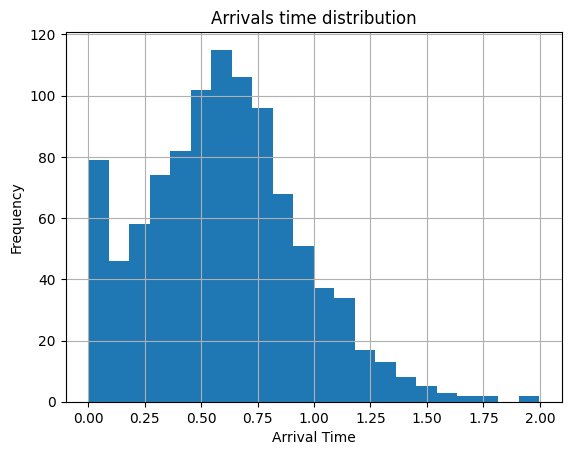

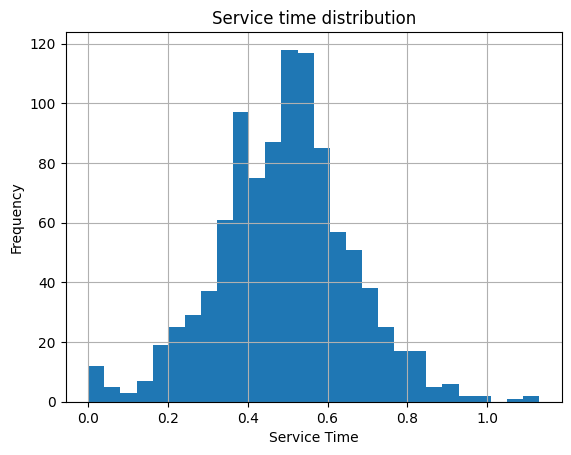

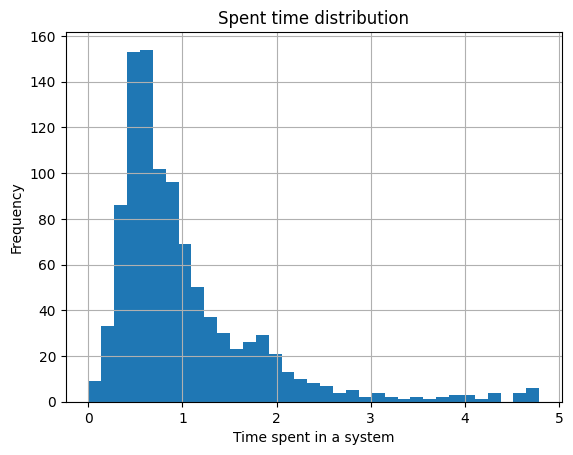

Simulation #3
Number of samples taken:  1000
Number of clients generated:  1001
Number of clients served:  1000
Queue report:
Items entered:  1001
Items departed:  1000
Queue current length:  1
Queue max length:  4
Queue mean length:  0.08
Queue mean delay:  0.04
Server utiliation:  0.34
Number of clients served:  1000


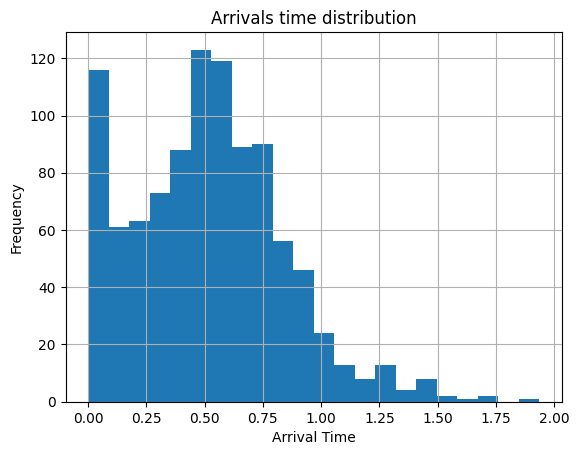

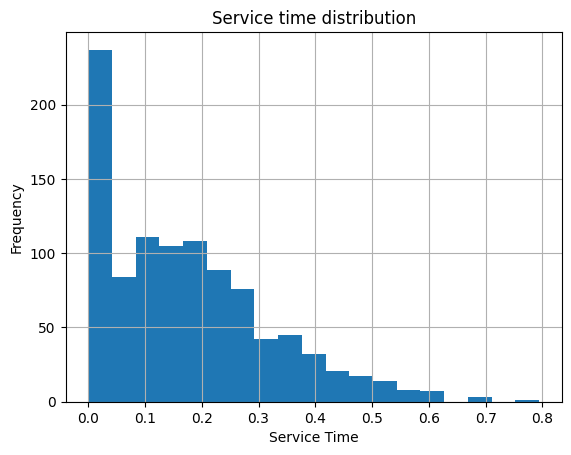

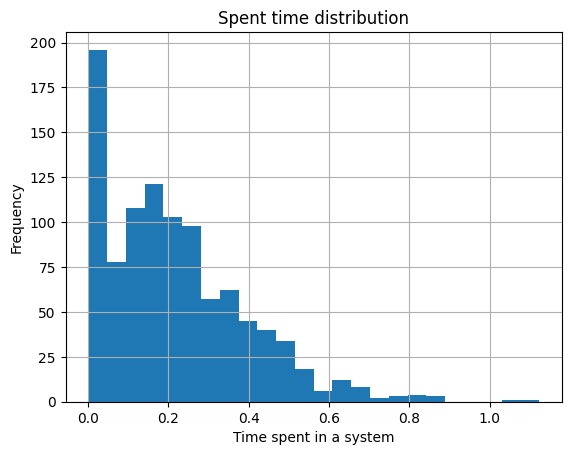

Simulation #4
Number of samples taken:  1000
Number of clients generated:  1000
Number of clients served:  1000
Queue report:
Items entered:  1000
Items departed:  1000
Queue current length:  0
Queue max length:  6
Queue mean length:  0.59
Queue mean delay:  0.87
Server utiliation:  0.73
Number of clients served:  1000


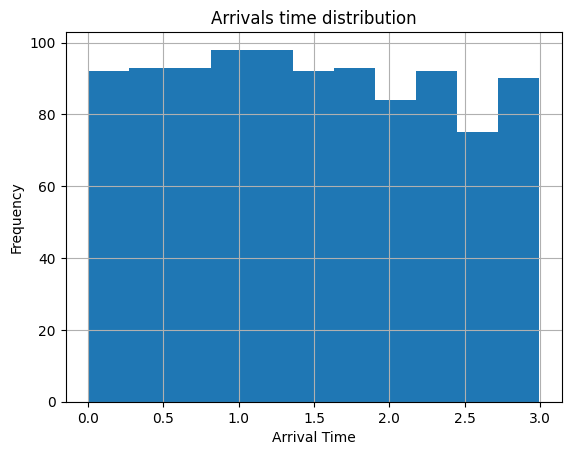

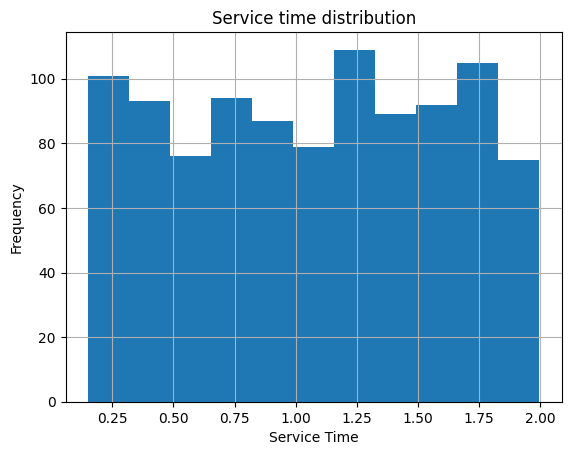

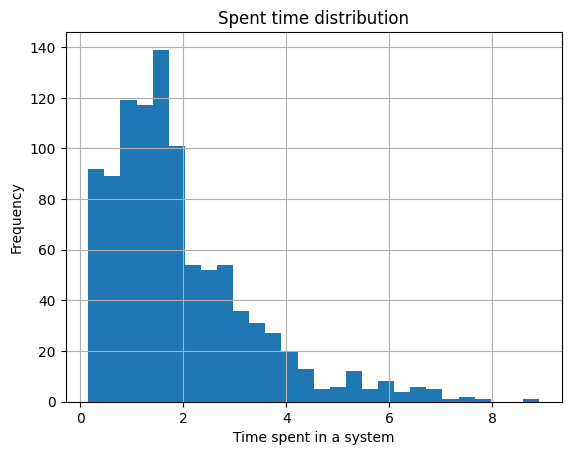

In [3]:
for i in range(len(factory)):
    title = 'Simulation #' + str(i+1)
    app = Simulation(title, factory[i])
    app.run()
    app.show()

### Simulation experiment
Simulation of the system for the given four types of factories. Every simulation is going to be executed 10 times for every factory and the results are goint to be saved in a table with the two input propability distributions (arrivals and service time) and one output distribution (time spent in a system). 

In [4]:
# Time intervals for input and output dsitrbutions
bin_edges_arrivals = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]
bin_edges_services = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
bin_edges_time_spent = [0, 0.5 , 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Create a DataFrame for the output data
arrival_header = []
for i in range(len(bin_edges_arrivals)-1):
    arrival_header.append(f"{bin_edges_arrivals[i]}-{bin_edges_arrivals[i+1]}")
service_header = []
for i in range(len(bin_edges_services)-1):
    arrival_header.append(f"{bin_edges_services[i]}-{bin_edges_services[i+1]}")
spent_time_header = []
for i in range(len(bin_edges_time_spent)-1):
    arrival_header.append(f"{bin_edges_time_spent[i]}-{bin_edges_time_spent[i+1]}")

header = list(arrival_header+service_header+spent_time_header)
simulated_data = pd.DataFrame(columns=header, dtype=float)


for f in factory:
    for i in range(100):
        sim = Simulation("Simulation", f)
        sim.run()
        frequencies_arrivals, _ = np.histogram(sim.arrivals.data, bins=bin_edges_arrivals)
        frequencies_services, _ = np.histogram(sim.services.data, bins=bin_edges_services)
        frequencies_time_spent, _ = np.histogram(sim.spent_time, bins=bin_edges_time_spent)
        output = frequencies_arrivals.tolist()+frequencies_services.tolist()+frequencies_time_spent.tolist()
        output = [float(i) for i in output]  # retyped to float
        simulated_data.loc[len(simulated_data)] = output
        simulated_data.to_excel('training_set.xlsx', index=False)

# Transformation to relative frequency
for i in range(0, len(simulated_data.columns), 10):
    simulated_data.iloc[:, i:i+10] = simulated_data.iloc[:, i:i+10].div(simulated_data.iloc[:, i:i+10].sum(axis=1), axis=0)

simulated_data.to_excel('training_set.xlsx', index=False)
simulated_data

,0-0.3,0.3-0.6,0.6-0.9,0.9-1.2,1.2-1.5,1.5-1.8,1.8-2.1,2.1-2.4,2.4-2.7,2.7-3.0,...,0-0.5,0.5-1,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
0,0.031,0.087,0.257,0.331,0.218,0.055,0.017,0.003,0.001,0.000,...,0.457000,0.517000,0.025000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.034,0.097,0.245,0.354,0.195,0.055,0.018,0.001,0.001,0.000,...,0.437000,0.542000,0.019000,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.034,0.099,0.263,0.339,0.195,0.053,0.015,0.000,0.002,0.000,...,0.452000,0.519000,0.028000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.032,0.108,0.242,0.361,0.189,0.054,0.013,0.001,0.000,0.000,...,0.444000,0.517000,0.037000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.031,0.097,0.252,0.356,0.200,0.041,0.017,0.004,0.002,0.000,...,0.426000,0.546000,0.027000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.094,0.103,0.124,0.092,0.093,0.094,0.095,0.115,0.106,0.084,...,0.076923,0.202429,0.185223,0.226721,0.102227,0.071862,0.052632,0.032389,0.031377,0.018219
396,0.085,0.102,0.106,0.096,0.100,0.099,0.100,0.102,0.110,0.100,...,0.094949,0.201010,0.188889,0.221212,0.108081,0.062626,0.048485,0.042424,0.016162,0.016162
397,0.088,0.098,0.110,0.100,0.114,0.080,0.103,0.108,0.099,0.100,...,0.109969,0.169579,0.245632,0.209661,0.106886,0.057554,0.043165,0.025694,0.021583,0.010277
398,0.096,0.103,0.095,0.109,0.100,0.105,0.088,0.099,0.114,0.091,...,0.081901,0.166835,0.221436,0.228514,0.104146,0.072801,0.057634,0.032356,0.019211,0.015167


## Learning from Monte-Carlo Simulation
### Training neural net
Import modules

In [5]:
import numpy as np
import pandas as pd
from backpropagation import BackPropagation

Create training set from the simulation result and learn multilayered neural network.

In [6]:
training_data = pd.read_excel('training_set.xlsx')
training_data.head()
training_set = []
for index, row in training_data.iterrows():
    features = row.iloc[:20].tolist()  
    result = row.iloc[-10:].tolist() 
    training_set.append((features, result))

bpnn = BackPropagation(training_set,[20, 15, 15, 10], [0.3, 0.3, 0.3], 1000)
bpnn.backpropagation()
for row in training_set:
    net_input = row[0]
    bpnn.feed_forward(net_input)
    net_output = bpnn.output_activation.reshape([1,10])
    print("Input: ", net_input, " Output: ", net_output.flatten().tolist())
    


Input:  [0.031, 0.087, 0.257, 0.331, 0.218, 0.055, 0.017, 0.003, 0.001, 0.0, 0.056, 0.218, 0.441, 0.231, 0.045, 0.009, 0.0, 0.0, 0.0, 0.0]  Output:  [0.47, 0.51, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Input:  [0.034, 0.097, 0.245, 0.354, 0.195, 0.055, 0.018, 0.001, 0.001, 0.0, 0.048, 0.235, 0.439, 0.224, 0.047, 0.006, 0.0, 0.001, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Input:  [0.034, 0.099, 0.263, 0.339, 0.195, 0.053, 0.015, 0.0, 0.002, 0.0, 0.052, 0.238, 0.457, 0.195, 0.052, 0.004, 0.002, 0.0, 0.0, 0.0]  Output:  [0.49, 0.5, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Input:  [0.032, 0.108, 0.242, 0.361, 0.189, 0.054, 0.013, 0.001, 0.0, 0.0, 0.042, 0.236, 0.456, 0.218, 0.037, 0.007, 0.003, 0.001, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Input:  [0.031, 0.097, 0.252, 0.356, 0.2, 0.041, 0.017, 0.004, 0.002, 0.0, 0.052, 0.226, 0.476, 0.203, 0.036, 0.006, 0.001, 0.0, 0.0, 0.0]  Output:  [0.48, 0.5, 0.02, 0.0, 0.0, 0.0, 0.0, 

Computer errors and draw the history of learning

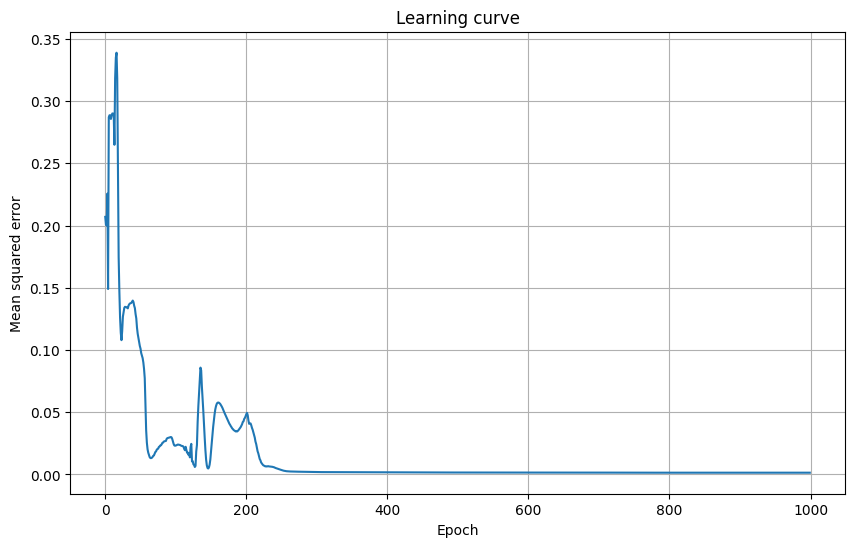

Mean squared error:  0.0013685180741390202
Max error of the single output neuron:  0.07300000000000001


In [7]:
# Draw the learning curve
plt.figure(figsize=(10, 6))
plt.plot(bpnn.history)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error')
plt.title('Learning curve')
plt.grid(True)
plt.show()

# Mean square error
error = bpnn.calculate_mean_squared_error()
print("Mean squared error: ", error)

# Max error of the single output neuron
max_error = bpnn.calculate_max_error()
print("Max error of the single output neuron: ", max_error)

### Find solution for examples
Neural net replicates results of the Monte Carlo simulation

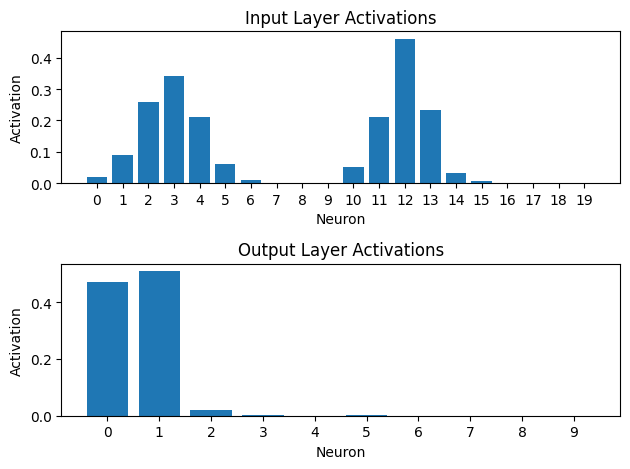

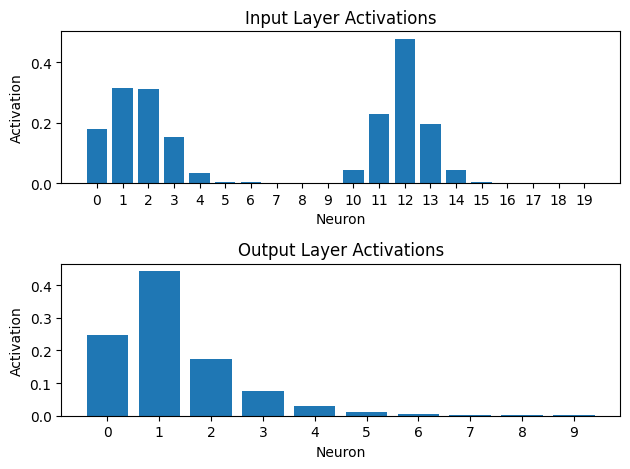

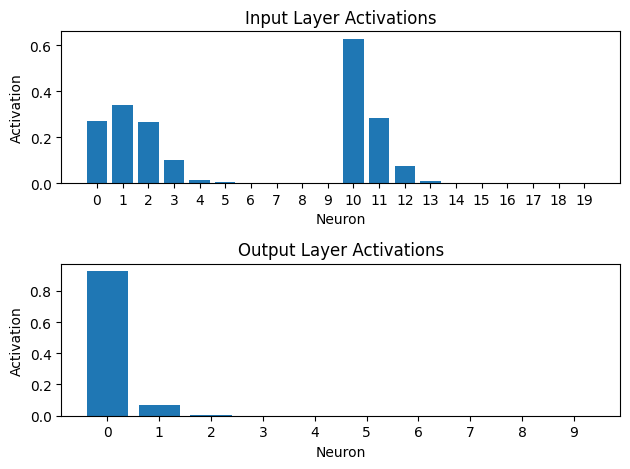

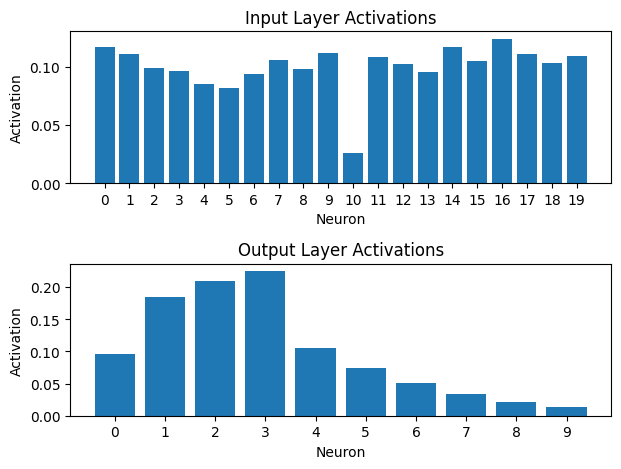

,0-0.3,0.3-0.6,0.6-0.9,0.9-1.2,1.2-1.5,1.5-1.8,1.8-2.1,2.1-2.4,2.4-2.7,2.7-3.0,...,0-0.5,0.5-1,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
0,0.021,0.090,0.259,0.342,0.211,0.062,0.011,0.002,0.002,0.000,...,0.47,0.51,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.181,0.315,0.313,0.152,0.033,0.003,0.003,0.000,0.000,0.000,...,0.25,0.44,0.17,0.07,0.03,0.01,0.00,0.00,0.00,0.00
2,0.273,0.339,0.268,0.099,0.015,0.006,0.000,0.000,0.000,0.000,...,0.93,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.117,0.111,0.099,0.096,0.085,0.082,0.094,0.106,0.098,0.112,...,0.10,0.18,0.21,0.22,0.10,0.07,0.05,0.03,0.02,0.01


In [8]:
input_data = pd.read_excel('inference_set.xlsx')
input_data.head()
input_set = []
for index, row in input_data.iterrows():
    features = row.iloc[:20].tolist()
    input_set.append(features)

output_set = []
for net_input in input_set:
    net_output = bpnn.run(net_input)
    output_set.append(net_output)
    bpnn.plot_activations()

# Create a DataFrame for the output data
header = list(training_data.columns)
output_data = pd.DataFrame(columns=header)

for i in range(len(input_set)):
    row = input_set[i] + output_set[i]
    output_data.loc[i] = row

output_data.to_excel('result_set.xlsx', index=False)
output_data